# Exploratory Data Analysis of Telco Churn dataset (by: Aadi Deshpande)

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the graphs in the notebook
%matplotlib inline

In [2]:
tdata = pd.read_csv('telco-cust-churn.csv')

In [3]:
tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tdata.shape #no. of rows and columns

(7043, 21)

In [5]:
#remove customer id as it is not useful 
tdata.drop(['customerID'], axis = 1, inplace = True)
tdata.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
tdata['Churn'].replace(('Yes','No'), (1,0), inplace = True)
#tdata['Churn'] = tdata['Churn'].replace({"Yes" : 1}, {"No" : 0})
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(3), object(16)
memory usage: 1.1+ MB


In [7]:
tdata['TotalCharges'] = pd.to_numeric(tdata['TotalCharges'], errors='coerce')

In [8]:
tdata.isnull().sum()
#we have 11 missing values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#we remove the row of data with the missing values
tdata.dropna(axis = 0, inplace=True)

In [10]:
tdata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# Exploring the data by using Count Plots

% of non churners are  73.42
% of churners are  26.58


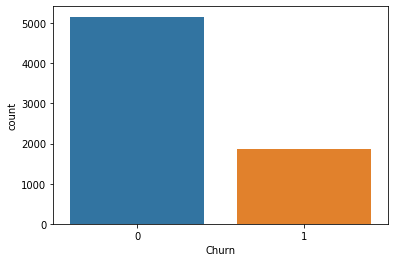

In [12]:
sns.countplot(x='Churn', data=tdata)
x,y = tdata['Churn'].value_counts()
print('% of non churners are ' , round(x/7032 * 100,2))
print('% of churners are ' , round(y/7032 * 100,2))

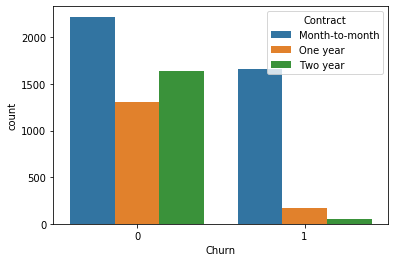

In [13]:
sns.countplot(x='Churn',hue='Contract', data = tdata)


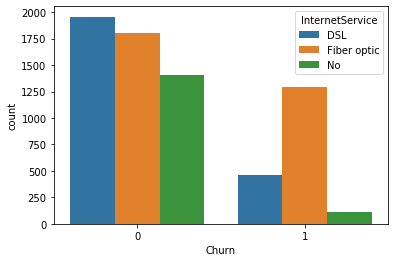

In [14]:
sns.countplot(x='Churn',hue='InternetService', data = tdata)
#most customers more likely to churn have a fiber optic connection

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

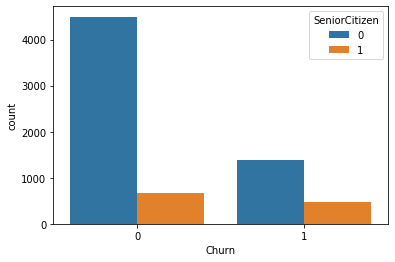

In [15]:
sns.countplot(x='Churn',hue='SeniorCitizen', data = tdata)
tdata['SeniorCitizen'].value_counts()

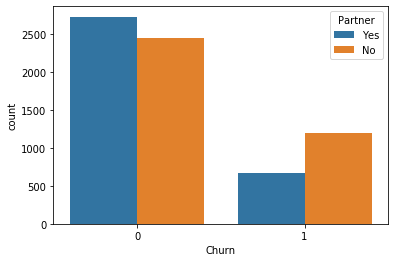

In [16]:
sns.countplot(x='Churn', hue='Partner', data=tdata)

Male      3549
Female    3483
Name: gender, dtype: int64

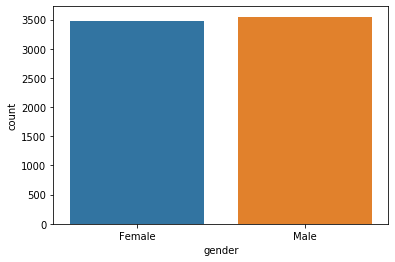

In [17]:
sns.countplot(x='gender', data = tdata)
tdata['gender'].value_counts()
#there are the almost the same number of males and females in the data

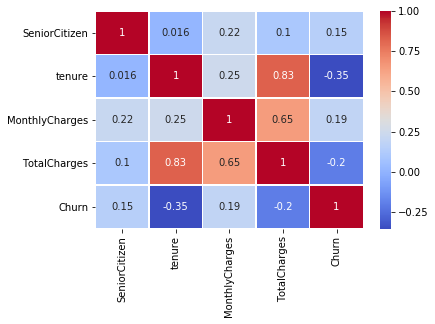

In [18]:
sns.heatmap(tdata.corr(),annot=True, cmap='coolwarm', linewidth = .5)
# a strong association between total charges and tenure can be seen
#there is no strong correlation bewteen churn and other features

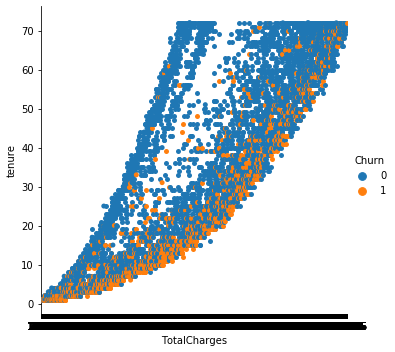

In [21]:
sns.catplot(x='TotalCharges', y='tenure',hue='Churn', data=tdata)

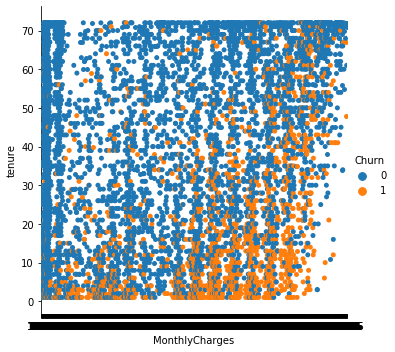

In [22]:
sns.catplot(x='MonthlyCharges', y = 'tenure',hue='Churn',data= tdata)
#people with low tenure and high monthly charges are more likely to change the service provider

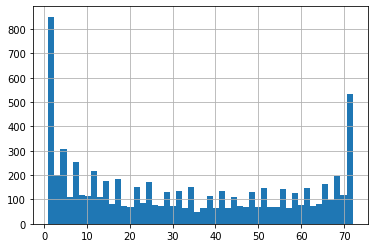

In [23]:
tdata['tenure'].hist(bins=50) #majority customers has tenure between 0-10 and >70

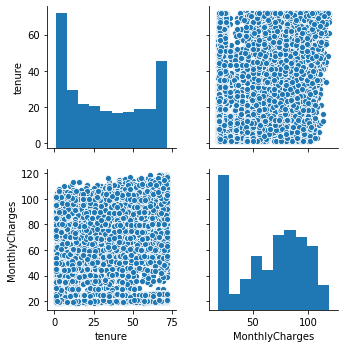

In [24]:
ppdata1 = tdata[['tenure', 'MonthlyCharges']]
sns.pairplot(data = ppdata1)
#customers having higher tenure are more likely to change their 

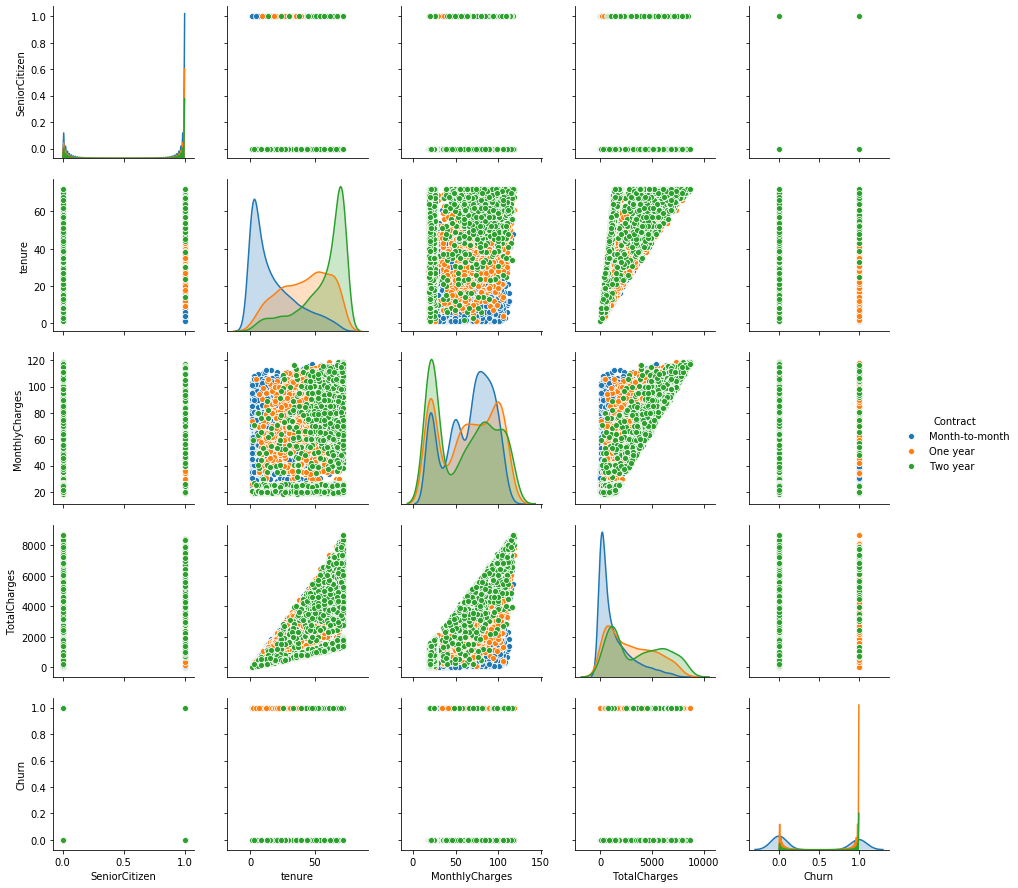

In [25]:
sns.pairplot(data=tdata, hue='Contract')
#most customers who have a two year contract have high tenure 

In [ ]:

#Let us plot a better correlation map.
#we convert the Yes and No to 1 and 0 respectively
gender = pd.get_dummies(tdata['gender'],drop_first=True)
senior = pd.get_dummies(tdata['SeniorCitizen'], drop_first = True)
partner = pd.get_dummies(tdata['Partner'], drop_first = True)
depend = pd.get_dummies(tdata['Dependents'], drop_first = True)
phservice = pd.get_dummies(tdata['PhoneService'], drop_first = True)
onlinesec = pd.get_dummies(tdata['OnlineSecurity'], drop_first = True)
onlinebkp = pd.get_dummies(tdata['OnlineBackup'], drop_first = True)
deviceprotect = pd.get_dummies(tdata['DeviceProtection'], drop_first = True)
techsupport = pd.get_dummies(tdata['TechSupport'], drop_first = True)
streamtv = pd.get_dummies(tdata['StreamingTV'], drop_first = True)
streammovie = pd.get_dummies(tdata['StreamingMovies'], drop_first = True)
paperless = pd.get_dummies(tdata['PaperlessBilling'], drop_first = True)
churn = pd.get_dummies(tdata['Churn'], drop_first = True)
#tdata.drop(['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling' ] ])

#intservice_new = pd.get_dummies(tdata['InternetService'], drop_first = True)
#newdata = pd.get_dummies(tdata[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService']])
#newdata.head()

In [ ]:
#newdata = tdata.drop(['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling' ] ,axis = 1)
#newdata.head()
#newdata = pd.concat([gender, senior,partner,depend,phservice,onlinesec,onlinebkp,deviceprotect,techsupport,streamtv, streammovie,paperless,churn],axis = 1)

In [ ]:
#newdata

In [ ]:

newdata = pd.get_dummies(tdata[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']])
newdata.head()

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(newdata.corr(), cmap='coolwarm')